In [4]:
import json

In [5]:
with open("../budget_50000000,num_node_p=0.0005,batch=10000,delta=4,beta=4.json",'r') as f:
    dic = json.load(f)

In [12]:
def process(former,later):
    len_ = min(len(former), len(later))
    check_ = []
    for i in range(len_):
        check_.append(1 if former[i]==later[i] else 0)
    return sum(check_)/len_

In [18]:
res_list = []
key = list(dic.keys())
former = dic[key[0]][0]
for i in range(1, len(key)):
    item = key[i]
    later = dic[item][0]
    res_list.append(process(former, later))
    former = later

In [19]:
res_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0043859649122807015,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008771929824561403,
 0.0,
 0.0,
 0.004405286343612335,
 0.0,
 0.0,
 0.0,
 0.004405286343612335,
 0.004405286343612335,
 0.004405286343612335,
 0.0,
 0.0,
 0.004405286343612335,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004424778761061947,
 0.008849557522123894,
 0.0,
 0.0,
 0.0044444444444444444,
 0.0,
 0.0,
 0.013333333333333334,
 0.0,
 0.0,
 0.0044444444444444444,
 0.0,
 0.0044444444444444444,
 0.0,
 0.0044444444444444444,
 0.004464285714285714,
 0.004464285714285714,
 0.0,
 0.004464285714285714,
 0.0,
 0.0,
 0.0,
 0.004464285714285714,
 0.0,
 0.0,
 0.004484304932735426,
 0.0,
 0.0,
 0.0,
 0.004484304932735426,
 0.004484304932735426,
 0.0,
 0.0,
 0.0,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0,
 0.0045045045045045045,
 0.0,
 0.009009009009009009,
 0.0045045045045045045,
 0.0,
 0.004524886877

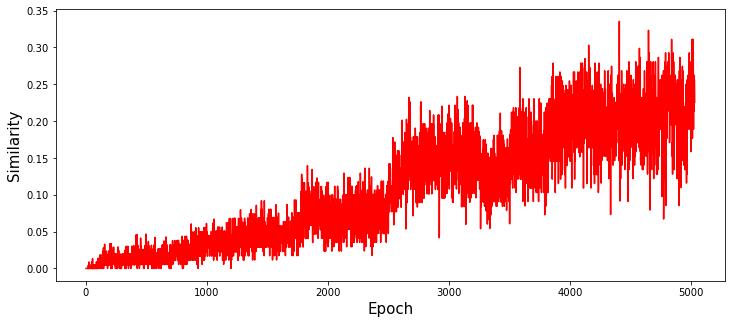

In [26]:
from matplotlib import pyplot as plt
x = list(range(1,len(res_list)+1))
#设置图形大小
plt.rcParams['figure.figsize'] = (12.0,5.0)
fig = plt.figure()
#画柱形图
ax1 = fig.add_subplot(111)
ax1.plot(x, res_list, 'r', ms=10)
ax1.set_xlabel('Epoch',fontsize='15')
ax1.set_ylabel("Similarity", fontsize='15')
#ax1.set_title("数据统计",fontsize='20')
#画折线图 
plt.show()
fig.savefig("model_similarity_1"+".jpg", dpi = 100)

# Big lab

In [29]:
import numpy as np
import pandas as pd
import re

In [45]:
path = "../zsVig/trial.log"
out_path = "../zsVig/result.csv"
out_path_fig = "../zsVig/result.jpg"

In [35]:
def pro(input_path):
    i = 0
    scanned_seed = []
    activate_node = []
    Hit_rate = []
    remain_seed = []
    merge_num_list = []
    merge_num = 0
    with open(input_path,'r') as f:
        line = f.readline()
        while line:
            try:
                if 'active' in line:
                    res = re.findall(r"\d+\.?\d*",line)
                    activate_node.append(eval(res[6]))
                elif "Hit" in line:
                    res = re.findall(r"\d+\.?\d*",line)
                    Hit_rate.append(eval(res[6]))
                    remain_seed.append(eval(res[7]))
                    merge_num_list.append(merge_num)
                    merge_num = 0
                elif "[+]Scanning" in line:
                    res = re.findall(r"\d+\.?\d*",line)
                    scanned_seed.append(eval(res[6]))
                elif "merge" in line:
                    merge_num+=1
                line = f.readline()
            except:
                next(f)
                line = f.readline()
    len_ = min([len(Hit_rate), len(scanned_seed), len(activate_node), len(remain_seed), len(merge_num_list)])
    if len_>1000:
        return Hit_rate[:len_:10], scanned_seed[:len_:10], activate_node[:len_:10], remain_seed[:len_:10], merge_num_list[:len_:10]
    return Hit_rate[:len_], scanned_seed[:len_], activate_node[:len_], remain_seed[:len_], merge_num_list[:len_]

In [42]:
Hit_rate, scanned_seed, activate_node, remain_seed, merge_num_list = pro(path)
dic = {"hit_rate":Hit_rate,"remain_time":remain_seed,"scaned_number":scanned_seed,"activate_number":activate_node,"merge_num_list": merge_num_list}
df = pd.DataFrame(dic)
df.to_csv(out_path,index=False)

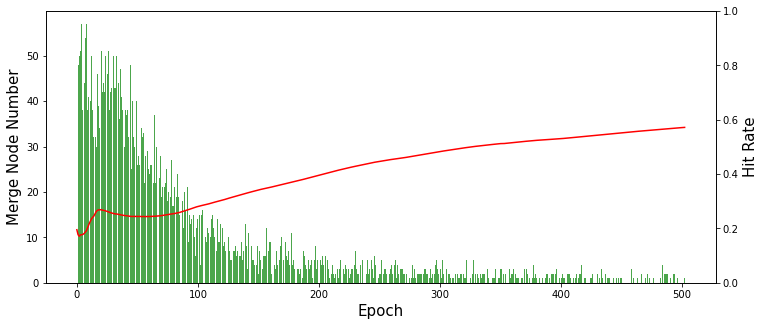

In [46]:
data = pd.read_csv(out_path)
x = list(data.index)
y1 = data["merge_num_list"]
y2 = data["hit_rate"]
#设置图形大小
plt.rcParams['figure.figsize'] = (12.0,5.0)
fig = plt.figure()
#画柱形图
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,alpha=0.7,color='g')
ax1.set_ylabel('Merge Node Number',fontsize='15')
ax1.set_xlabel('Epoch', fontsize='15')
#ax1.set_title("数据统计",fontsize='20')
#画折线图 
ax2 = ax1.twinx()   #组合图必须加这个
ax2.plot(x, y2, 'r',ms=10)
ax2.set_ylabel('Hit Rate',fontsize='15')
ax2.set_ylim([0, 1])
plt.show()
fig.savefig(out_path_fig, dpi = 100)

## 找出1KW 2KW 3KW 4KW 5KW 的点